## Fractional Maxwell

In [12]:
using RHEOS
using PyPlot

In [2]:
FractionalMaxwell


Model name: fractmaxwell

Free parameters: cₐ, a, cᵦ and β

             ___╱╲__________╱╲____
                ╲╱          ╲╱
                  cₐ,a         cᵦ, β
                 

### Consitutive equation

$\sigma(t) + \frac{c_\alpha}{c_\beta} \frac{d^{\alpha-\beta} \sigma(t)}{dt^{\alpha-\beta}}= c_{\alpha} \frac{d^\alpha \epsilon(t)}{dt^\alpha}$

### Relaxation modulus

$G(t) = c_\beta t^{-\beta} E_{\alpha-\beta,1-\beta}\left(-\frac{c_\beta}{c_\alpha} t^{\alpha-\beta}\right)$ 

### Creep modulus

$J(t) = \frac{1}{c_\alpha \Gamma(1+\alpha)}t^\alpha+\frac{1}{c_\beta \Gamma(1+\beta)}t^\beta$ 

### Storage modulus

$G^{\prime}(\omega) = \frac{\left(c_\beta \omega^\beta\right)^2 \cdot c_\alpha \omega^\alpha \cos(\alpha \frac{\pi}{2}) + \left(c_\alpha \omega^\alpha\right)^2 \cdot c_\beta \omega^\beta \cos(\beta \frac{\pi}{2})}{\left(c_\alpha \omega^\alpha\right)^2+\left(c_\beta \omega^\beta\right)^2+2c_\alpha \omega^\alpha \cdot c_\beta \omega^\beta \cos((\alpha-\beta)\frac{\pi}{2})}$

### Loss modulus

$G^{\prime\prime}(\omega) = \frac{\left(c_\beta \omega^\beta\right)^2 \cdot c_\alpha \omega^\alpha \sin(\alpha \frac{\pi}{2}) + \left(c_\alpha \omega^\alpha\right)^2 \cdot c_\beta \omega^\beta \sin(\beta \frac{\pi}{2})}{\left(c_\alpha \omega^\alpha\right)^2+\left(c_\beta \omega^\beta\right)^2+2c_\alpha \omega^\alpha \cdot c_\beta \omega^\beta \cos((\alpha-\beta)\frac{\pi}{2})}$


## Fractional (Spring) Maxwell

In [3]:
FractionalMaxwellSpring


Model name: fractmaxwell_spring

Free parameters: cₐ, a and k

           ___╱╲_________╱╲  ╱╲  ╱╲  ________
              ╲╱           ╲╱  ╲╱  ╲╱
                cₐ,a               k
               

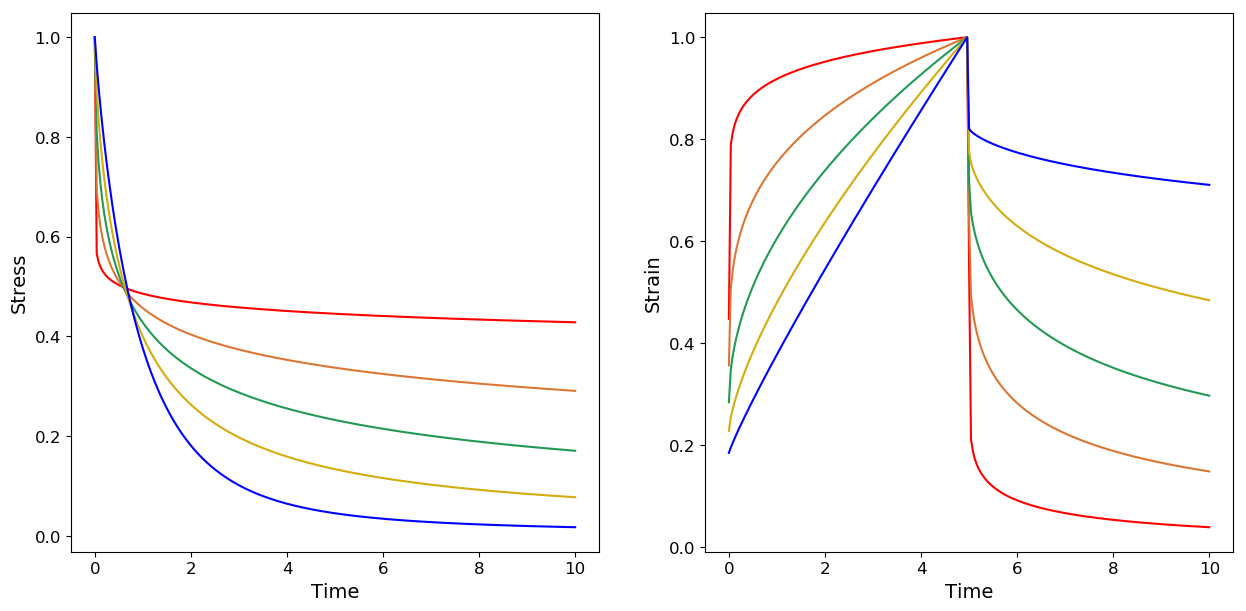

In [4]:
# Create a time only dataset
dϵ = timeline()
dσ = timeline()

# calculate a strain/stress data by appling a function of time (by defalut a unit step otherwise substitute hstep(amp = 2.))
dϵ = strainfunction(dϵ, hstep())
dσ = stressfunction(dσ, hstep()) - stressfunction(dσ, hstep(offset = 5.0))

colplot = ["red", "#dc7633", "#229954", "#d4ac0d", "blue"]

fig, ax = subplots(1,2, figsize=(15,7))


# plot moduli for varying α
for (i,alpha) in enumerate([0.1, 0.3, 0.5, 0.7, 0.9])
    
    fmaxwellspring_model = RheoModel(FractionalMaxwellSpring,(cₐ = 1.0, a = alpha, k = 1.0))
    
    #Relaxation modulus
    dG_fmaxwellspring = modelpredict(dϵ, fmaxwellspring_model)
    ax[1].plot(dG_fmaxwellspring.t, dG_fmaxwellspring.σ./maximum(dG_fmaxwellspring.σ), color=colplot[i])
    
    # Creep modulus
    dJ_fmaxwellspring = modelpredict(dσ, fmaxwellspring_model)
    ax[2].plot(dJ_fmaxwellspring.t, dJ_fmaxwellspring.ϵ./maximum(dJ_fmaxwellspring.ϵ), color=colplot[i])
 
end

ax[1].set_xlabel("Time", fontsize = 14);
ax[1].set_ylabel("Stress", fontsize = 14);
ax[1].tick_params("both", labelsize=12);

ax[2].set_xlabel("Time", fontsize = 14);
ax[2].set_ylabel("Strain", fontsize = 14);
ax[2].tick_params("both", labelsize=12);

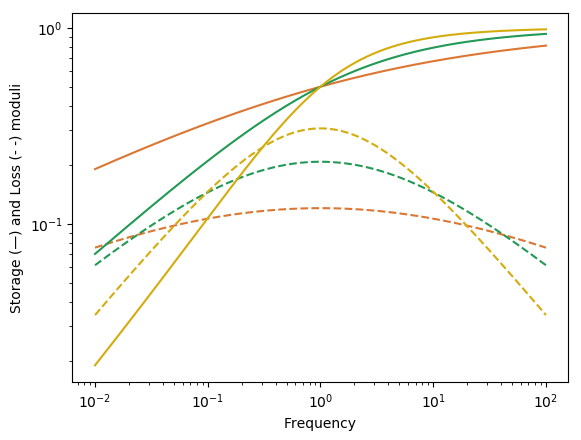

In [5]:
dω = frequencyspec()

colplot = ["#dc7633", "#229954", "#d4ac0d", "blue"]

# plot moduli for varying α
for (i,alpha) in enumerate([0.3, 0.5, 0.7])
    
    fmaxwellspring_model = RheoModel(FractionalMaxwellSpring,(cₐ = 1.0, a = alpha, k = 1.0))
    
    # Storage and Loss moduli
    d_fmaxwellspring = dynamicmodelpredict(dω, fmaxwellspring_model)
    loglog(d_fmaxwellspring.ω, d_fmaxwellspring.Gp, color=colplot[i], "-")
    loglog(d_fmaxwellspring.ω, d_fmaxwellspring.Gpp, color=colplot[i], "--")
end

xlabel("Frequency");
ylabel("Storage (—) and Loss (- -) moduli");

## Fractional (Dashpot) Maxwell

In [6]:
FractionalMaxwellDashpot


Model name: fractmaxwell_dashpot

Free parameters: η, cᵦ and β

                  ___
              _____| |_________╱╲____
                  _|_|         ╲╱
                    η            cᵦ, β
                 

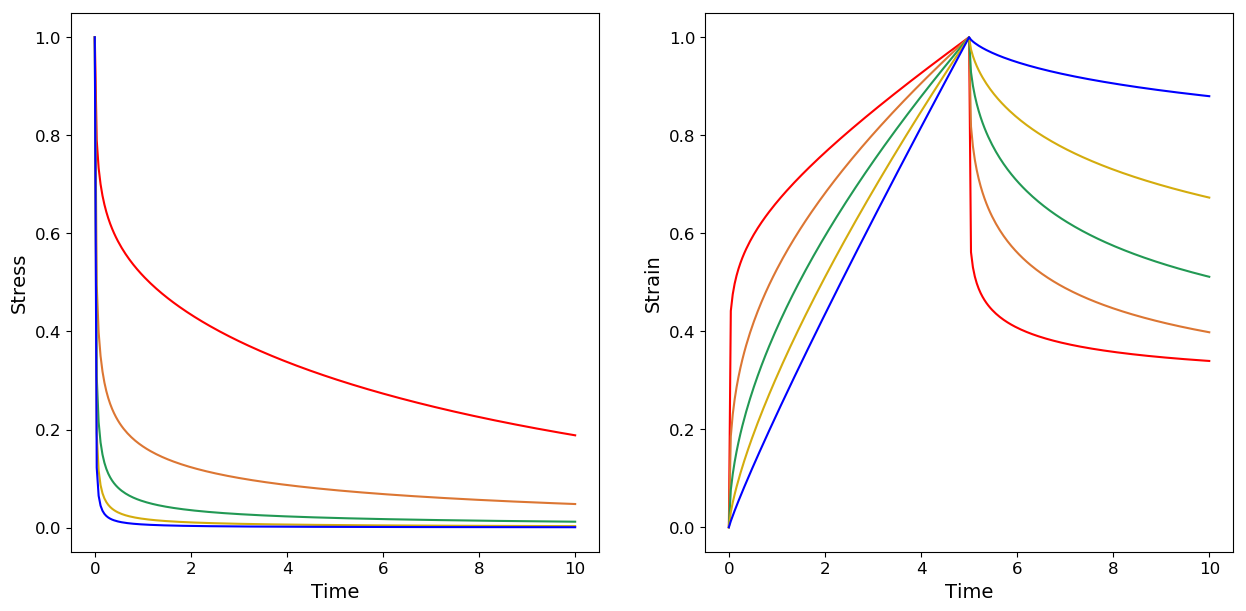

In [7]:
# Create a time only dataset
dϵ = timeline()
dσ = timeline()

# calculate a strain/stress data by appling a function of time (by defalut a unit step otherwise substitute hstep(amp = 2.))
dϵ = strainfunction(dϵ, hstep())
dσ = stressfunction(dσ, hstep()) - stressfunction(dσ, hstep(offset = 5.0))

colplot = ["red", "#dc7633", "#229954", "#d4ac0d", "blue"]

fig, ax = subplots(1,2, figsize=(15,7))


# plot moduli for varying β
for (i,beta) in enumerate([0.1, 0.3, 0.5, 0.7, 0.9])
    
    fmaxwelldashpot_model = RheoModel(FractionalMaxwellDashpot,(η = 10, cᵦ= 1.0, β = beta))
    
    #Relaxation modulus
    dG_fmaxwelldashpot = modelpredict(dϵ, fmaxwelldashpot_model)
    ax[1].plot(dG_fmaxwelldashpot.t, dG_fmaxwelldashpot.σ./maximum(dG_fmaxwelldashpot.σ), color=colplot[i])
    
    # Creep modulus
    dJ_fmaxwelldashpot = modelpredict(dσ, fmaxwelldashpot_model)
    ax[2].plot(dJ_fmaxwelldashpot.t, dJ_fmaxwelldashpot.ϵ./maximum(dJ_fmaxwelldashpot.ϵ), color=colplot[i])
 
end

ax[1].set_xlabel("Time", fontsize = 14);
ax[1].set_ylabel("Stress", fontsize = 14);
ax[1].tick_params("both", labelsize=12);

ax[2].set_xlabel("Time", fontsize = 14);
ax[2].set_ylabel("Strain", fontsize = 14);
ax[2].tick_params("both", labelsize=12);

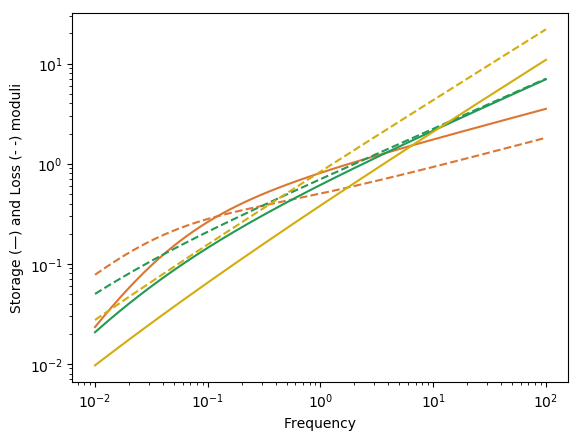

In [8]:
dω = frequencyspec()

colplot = ["#dc7633", "#229954", "#d4ac0d", "blue"]

# plot moduli for varying β
for (i,beta) in enumerate([0.3, 0.5, 0.7])
    
    fmaxwelldashpot_model = RheoModel(FractionalMaxwellDashpot,(η = 10, cᵦ= 1.0, β = beta))
    
    # Storage and Loss moduli
    d_fmaxwelldashpot = dynamicmodelpredict(dω, fmaxwelldashpot_model)
    loglog(d_fmaxwelldashpot.ω, d_fmaxwelldashpot.Gp, color=colplot[i], "-")
    loglog(d_fmaxwelldashpot.ω, d_fmaxwelldashpot.Gpp, color=colplot[i], "--")
end

xlabel("Frequency");
ylabel("Storage (—) and Loss (- -) moduli");

## Maxwell model

In [9]:
Maxwell


Model name: maxwell

Free parameters: η and k

                ___
            _____| |________╱╲  ╱╲  ╱╲  ___
                _|_|          ╲╱  ╲╱  ╲╱
                  η                  k
               

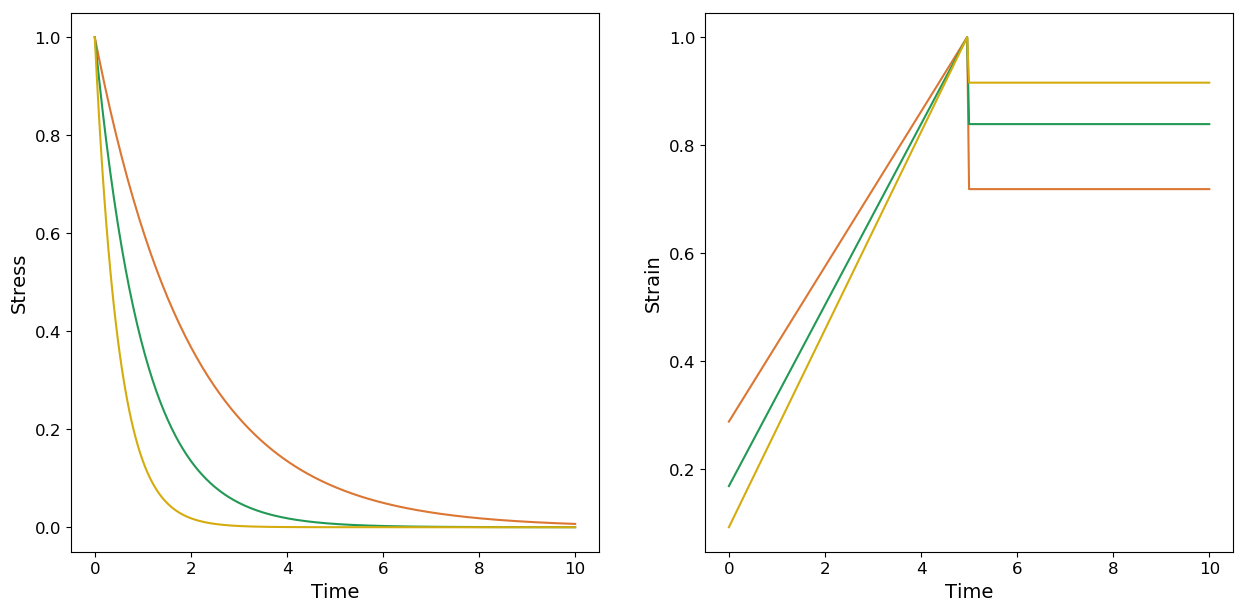

In [10]:
# Create a time only dataset
dϵ = timeline()
dσ = timeline()

# calculate a strain/stress data by appling a function of time (by defalut a unit step otherwise substitute hstep(amp = 2.))
dϵ = strainfunction(dϵ, hstep())
dσ = stressfunction(dσ, hstep()) - stressfunction(dσ, hstep(offset = 5.0))

fig, ax = subplots(1,2, figsize=(15,7))
colplot = ["#dc7633", "#229954", "#d4ac0d"]

# plot moduli for varying k
for (i,k) in enumerate([5.0, 10.0, 20.0])
    
    maxwell_model = RheoModel(Maxwell,(η = 10, k = k))
    
    #Relaxation modulus
    dG_maxwell = modelpredict(dϵ, maxwell_model)
    ax[1].plot(dG_maxwell.t, dG_maxwell.σ./maximum(dG_maxwell.σ), color=colplot[i])
    
    # Creep modulus
    dJ_maxwell = modelpredict(dσ, maxwell_model)
    ax[2].plot(dJ_maxwell.t, dJ_maxwell.ϵ./maximum(dJ_maxwell.ϵ), color=colplot[i])
 
end

ax[1].set_xlabel("Time", fontsize = 14);
ax[1].set_ylabel("Stress", fontsize = 14);
ax[1].tick_params("both", labelsize=12);

ax[2].set_xlabel("Time", fontsize = 14);
ax[2].set_ylabel("Strain", fontsize = 14);
ax[2].tick_params("both", labelsize=12);

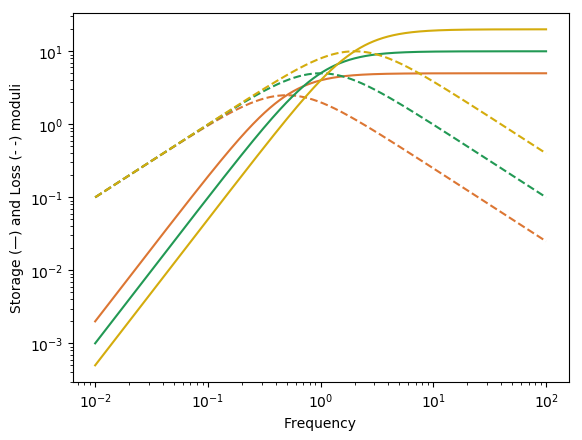

In [11]:
dω = frequencyspec()

colplot = ["#dc7633", "#229954", "#d4ac0d"]

# plot moduli for varying k
for (i,k) in enumerate([5.0, 10.0, 20.0])
    
    maxwell_model = RheoModel(Maxwell,(η = 10, k = k))
    
    # Storage and Loss moduli
    d_maxwell = dynamicmodelpredict(dω, maxwell_model)
    loglog(d_maxwell.ω, d_maxwell.Gp, color=colplot[i], "-")
    loglog(d_maxwell.ω, d_maxwell.Gpp, color=colplot[i], "--")
end

xlabel("Frequency");
ylabel("Storage (—) and Loss (- -) moduli");